In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d

In [2]:
from skimage import color, io

In [3]:
color_img = io.imread('data/koala.jpg')

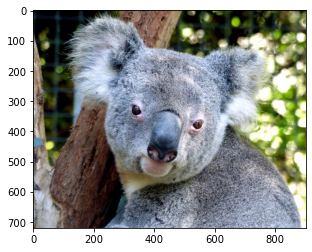

In [4]:
plt.imshow(color_img, cmap='gray');

In [5]:
img = color.rgb2gray(color_img)

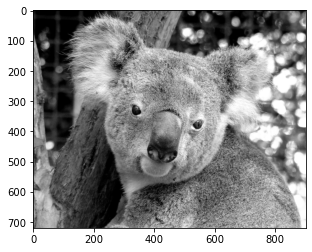

In [6]:
plt.imshow(img, cmap='gray');

In [7]:
img.shape

(720, 902)

In [8]:
HEIGHT, WIDTH = img.shape

In [19]:
distorted_img = img.copy()

In [20]:
distortion = 0.075 * np.random.randn(HEIGHT, WIDTH // 2)
distortion.shape

(720, 451)

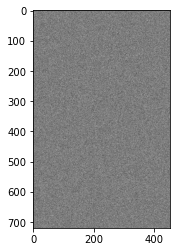

In [21]:
plt.imshow(distortion, cmap='gray');

In [22]:
distorted_img[:, WIDTH // 2:] += distortion

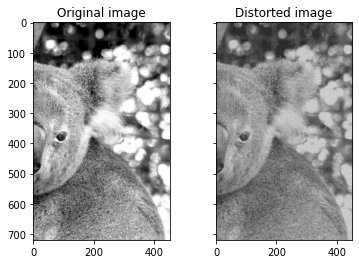

In [26]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].imshow(img[:, WIDTH // 2:], cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(distorted_img[:, WIDTH // 2:], cmap='gray')
ax[1].set_title('Distorted image');


In [27]:
patch_size = (7, 7)
data = extract_patches_2d(distorted_img[:, :WIDTH // 2], patch_size) 
# Extracting patches from non-distorted part of the image

In [28]:
data.shape

(317730, 7, 7)

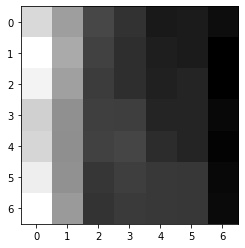

In [29]:
plt.imshow(data[0], cmap='gray');

In [30]:
data = data.reshape(data.shape[0], -1)
data.shape

(317730, 49)

In [31]:
d_learning = MiniBatchDictionaryLearning(n_components=100, alpha=1, n_iter=1000)
components = d_learning.fit(data).components_
components.shape

(100, 49)

In [32]:
components

array([[0.02040388, 0.06438921, 0.11896644, ..., 0.03828987, 0.04545519,
        0.13234347],
       [0.12962323, 0.08101939, 0.05395292, ..., 0.14238769, 0.09343046,
        0.04789564],
       [0.16156579, 0.16541088, 0.12509596, ..., 0.11399271, 0.09997777,
        0.11159498],
       ...,
       [0.11899324, 0.12625292, 0.1613906 , ..., 0.19323471, 0.1442526 ,
        0.09294142],
       [0.17365234, 0.18268369, 0.18148718, ..., 0.12251786, 0.1052265 ,
        0.10330123],
       [0.086992  , 0.10319792, 0.09164972, ..., 0.18355284, 0.1829608 ,
        0.18214828]])

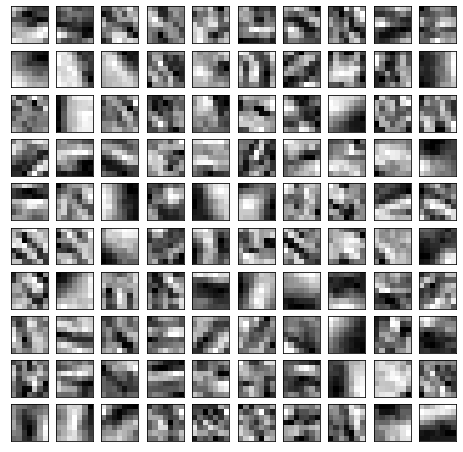

In [33]:
plt.figure(figsize=(8, 8))
for i, comp in enumerate(components):

    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape(patch_size), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())

plt.show();

In [34]:
right_data = extract_patches_2d(distorted_img[:, WIDTH // 2:], patch_size)

In [35]:
right_data = right_data.reshape(right_data.shape[0], -1)
right_data.shape

(317730, 49)

In [36]:
d_learning.set_params(
    transform_algorithm='lars',
    transform_n_nonzero_coefs=1,
)

MiniBatchDictionaryLearning(n_components=100, transform_algorithm='lars',
                            transform_n_nonzero_coefs=1)

In [37]:
code = d_learning.transform(right_data)

In [38]:
print(f'Shape of code: {code.shape}')
print(f'Shape of components: {components.shape}')

Shape of code: (317730, 100)
Shape of components: (100, 49)


In [39]:
patches = np.dot(code, components)
patches.shape

(317730, 49)

In [40]:
patches = patches.reshape(len(right_data), *patch_size)
patches.shape

(317730, 7, 7)

In [41]:
reconstructed_img = img.copy()

In [42]:
reconstructed_img[:, WIDTH // 2:] = \
    reconstruct_from_patches_2d(patches, (HEIGHT, WIDTH // 2))

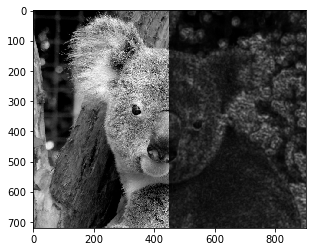

In [43]:
plt.imshow(reconstructed_img, cmap='gray', vmin=0, vmax=1, interpolation='nearest');

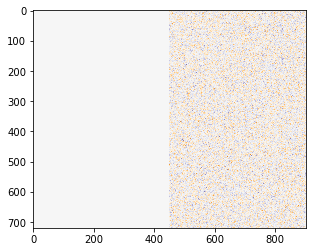

In [44]:
difference = img - distorted_img

plt.imshow(
    difference,
    cmap=plt.cm.PuOr,
    vmin=-0.5,
    vmax=0.5,
    interpolation='nearest'
);

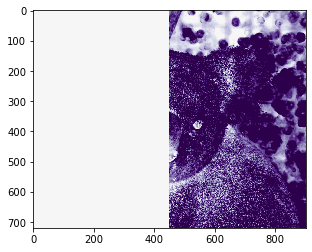

In [45]:
difference = img - reconstructed_img
plt.imshow(
    difference,
    cmap=plt.cm.PuOr,
    vmin=-0.5,
    vmax=0.5,
    interpolation='nearest'
);

In [46]:
d_learning.set_params(
    transform_algorithm='omp',
    transform_n_nonzero_coefs=1,
)

MiniBatchDictionaryLearning(n_components=100, transform_n_nonzero_coefs=1)

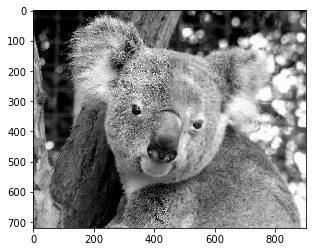

In [47]:
code = d_learning.transform(right_data)
patches = np.dot(code, components)
patches = patches.reshape(len(right_data), *patch_size)
reconstructed_img = img.copy()
reconstructed_img[:, WIDTH // 2:] = \
    reconstruct_from_patches_2d(patches, (HEIGHT, WIDTH // 2))
plt.imshow(
    reconstructed_img,
    cmap='gray',
    vmin=0,
    vmax=1,
    interpolation='nearest'
);

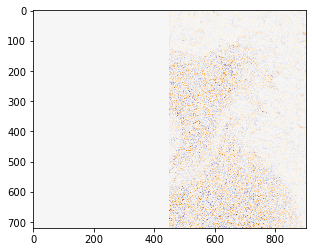

In [48]:
difference = img - reconstructed_img
plt.imshow(
    difference,
    cmap=plt.cm.PuOr,
    vmin=-0.5,
    vmax=0.5,
    interpolation='nearest'
);